<a href="https://colab.research.google.com/github/JaffySherlinA/PRODIGY_DS_01/blob/main/Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/train.csv")

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data.dropna(subset=["Survived"], inplace=True)

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.dropna(subset=["Embarked"], inplace=True)
data["Cabin"].fillna("Unknown", inplace=True)
data["Age"].fillna(data["Age"].mean(), inplace=True)

In [ ]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
data.duplicated().sum()

0

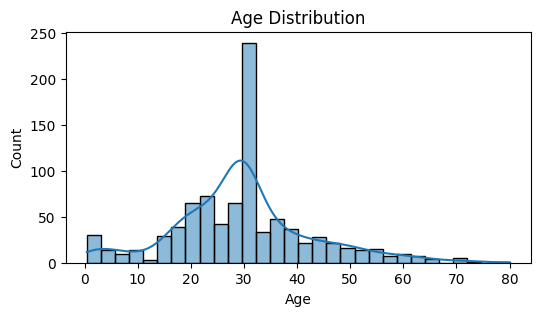

In [ ]:
plt.figure(figsize=(6, 3))
sns.histplot(data["Age"], kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

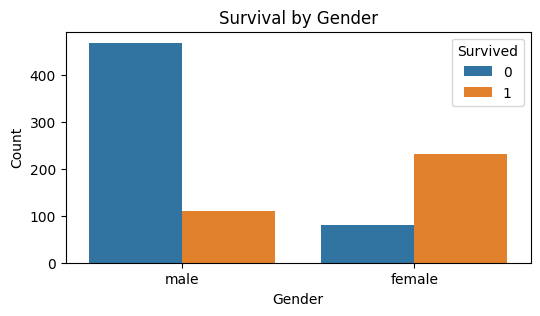

In [ ]:
plt.figure(figsize=(6, 3))
sns.countplot(data=data, x="Sex", hue="Survived")
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Survived", loc="upper right")
plt.show()

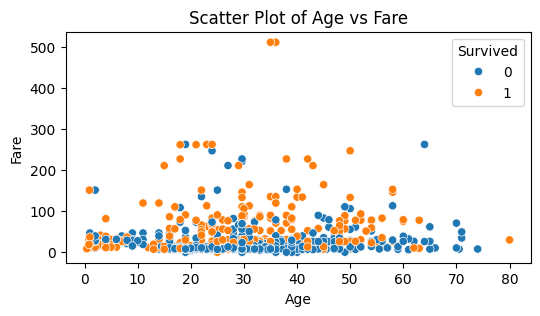

In [ ]:
plt.figure(figsize=(6, 3))
sns.scatterplot(data=data, x="Age", y="Fare", hue="Survived")
plt.title("Scatter Plot of Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title="Survived")
plt.show()

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

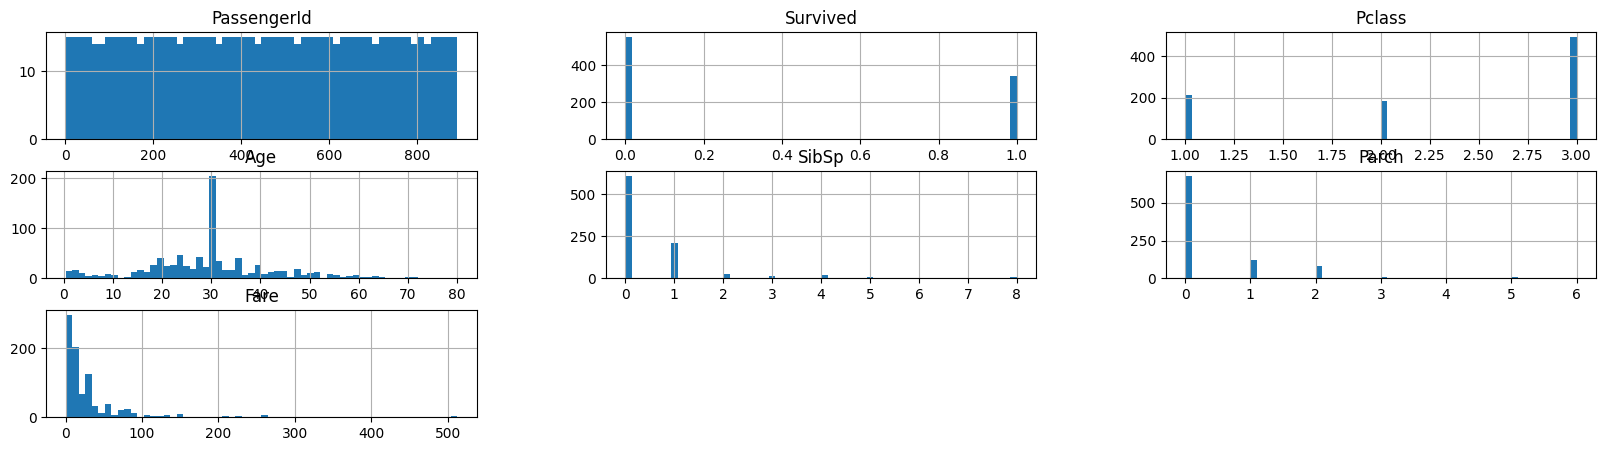

In [ ]:
data.hist(bins=60,figsize=(20,5))

In [ ]:
data['Age'].describe()
survivors = data.loc[data['Survived'] == 1, 'Sex']
data['Sex'].value_counts()
data['Survived'].value_counts()
survivors.value_counts()

Sex
female    231
male      109
Name: count, dtype: int64

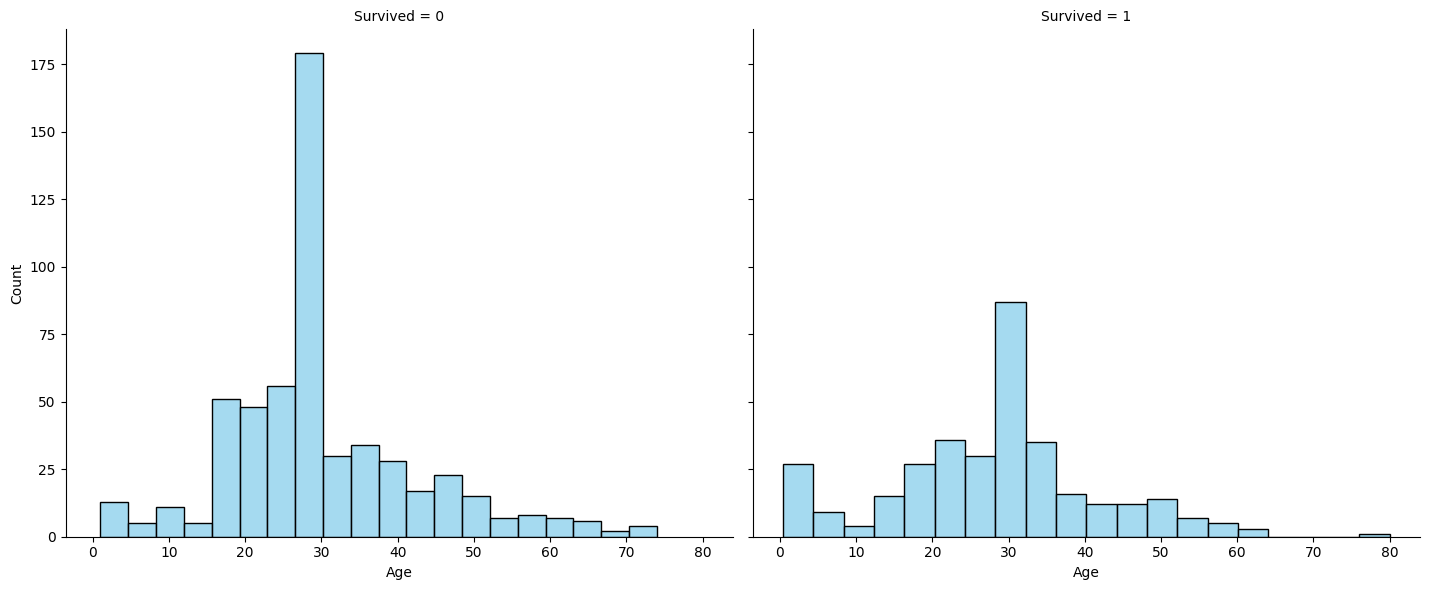

In [ ]:
fg = sns.FacetGrid(data,col='Survived',height=6, aspect=1.2)
fg.map(sns.histplot,'Age',bins=20,color='skyblue')

In [ ]:
Male_survived = data[(data['Sex']=='male') & (data['Survived']==1)].shape[0]
Female_survived = data[(data['Sex'] =='female') & (data['Survived']==1)].shape[0]
M_Percent = Male_survived/data['Survived'].sum()*100
F_Percent = Female_survived/data['Survived'].sum()*100
print(f' Total {Male_survived} males were survived with {int(M_Percent)} % out of the survival rate.')
print(f' Total {Female_survived} females were survived with {int(F_Percent)} % out of the survival rate.')

 Total 109 males were survived with 32 % out of the survival rate.
 Total 231 females were survived with 67 % out of the survival rate.


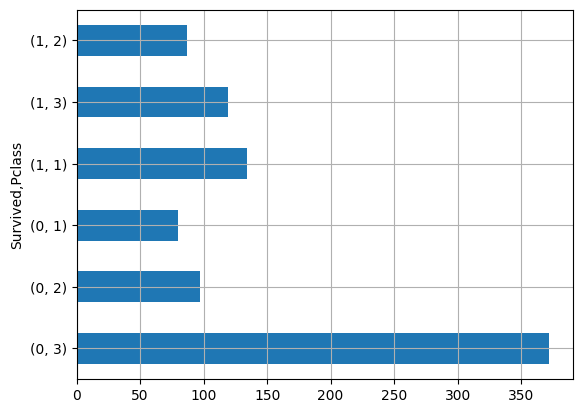

In [ ]:
data.groupby(['Survived'])[['Pclass']].value_counts().plot(kind='barh')
plt.grid(True)